In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("students_data.csv",names=['Student','University','CGPA','nan'])

In [ ]:
df = df.drop('nan',axis=1)
df.drop_duplicates
df

,Student,University,CGPA
0,Oliver Thompson,Harvard University,2
1,Emma Johnson,Stanford University,3.82
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
3,Olivia Brown,University of Cambridge,2.93
4,Noah Davis,University of Oxford,3.3
...,...,...,...
595,NaN,NaN,NaN
596,NaN,NaN,NaN
597,NaN,NaN,NaN
598,NaN,NaN,NaN


In [ ]:
df = df[df['Student'].notnull() & df['University'].notnull()]
df

,Student,University,CGPA
0,Oliver Thompson,Harvard University,2.00
1,Emma Johnson,Stanford University,3.82
2,Liam Smith,Massachusetts Institute of Technology (MIT),3.60
3,Olivia Brown,University of Cambridge,2.93
4,Noah Davis,University of Oxford,3.30
...,...,...,...
295,Max Turner,University of Amsterdam,3.09
296,Brooklyn Wilson,University of Copenhagen,3.23
297,Colton Carter,"University of California, Santa Barbara (UCSB)",2.20
298,Gabriella Lee,King's College London,2.50


In [ ]:
df['CGPA'].unique()

array(['2', '3.82', '3.6', '2.93', '3.3', '2.95', '2.5', '2.8', '2.45',
       '2.9', '3.01', '3.68', 'Annual ', '3.33', '2.33',
       '3.08(updated after 4 semester).', '2.76', nan, '3.37', '2.52',
       '3.1', '3.4', '3.53', '3.52', '3.2', '2.7', '2.83', '2.86', '3.08',
       '3.47', '3', '3.7', '2.58', '3.51', '3.25', '3.81', '2.97', '3.61',
       '2.94', '3.23', '2.92', '7.5', '2.51', '2.61', '3.28', '2.4',
       '3.26', '3.13', '2.6', '2.2', '3.18', '3.5', '2.96', '3.06',
       '3.58', '3.21 (6th semester completed)', '2.63', '3.12', '3.318',
       '3.45', '2.64', '2.3', '3.54', '2.84', '2.71', '3.78', '2.6/4',
       '3.07', '3.55', '2.48', '3.94', '3.04', '2.73', '3.05', '3.66',
       '3.74', '3.17', '2.78', '2.75', '3.95', '3.64', '3.88', '3.41',
       '3.93', '3.36', '2.89', '3.65', '2.74', '3.09', '3.24', '3.79',
       '4', '3.34', '3.72', '3.49', '2.57', '3.85', '2.87', '3.48',
       '3.43', '3.93/4', '3.44', '3.39', '3.59', '3.69', '3.96', '3.86',
       '3.57', 

In [ ]:
df['CGPA'] = df['CGPA'].str.replace('(6th semester completed)', '')
df['CGPA'] = df['CGPA'].str.replace('(updated after 4 semester).', '')
df['CGPA'] = df['CGPA'].str.replace('Annual', '0')
df['CGPA'] = df['CGPA'].str.replace("\(\.", '')
df['CGPA'] = df['CGPA'].str.replace("\(\)", '')
df['CGPA'] = df['CGPA'].str.replace("/", '')

<ipython-input-378-9fd4290c7b00>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CGPA'] = df['CGPA'].str.replace('(6th semester completed)', '')
<ipython-input-378-9fd4290c7b00>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CGPA'] = df['CGPA'].str.replace('(updated after 4 semester).', '')
<ipython-input-378-9fd4290c7b00>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CGPA'] = df['CGPA'].str.replace("\(\.", '')
<ipython-input-378-9fd4290c7b00>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CGPA'] = df['CGPA'].str.replace("\(\)", '')


In [ ]:
df['CGPA'] = df['CGPA'].astype('float')
df['CGPA'].unique()

array([2.   , 3.82 , 3.6  , 2.93 , 3.3  , 2.95 , 2.5  , 2.8  , 2.45 ,
       2.9  , 3.01 , 3.68 , 0.   , 3.33 , 2.33 , 3.08 , 2.76 ,   nan,
       3.37 , 2.52 , 3.1  , 3.4  , 3.53 , 3.52 , 3.2  , 2.7  , 2.83 ,
       2.86 , 3.47 , 3.   , 3.7  , 2.58 , 3.51 , 3.25 , 3.81 , 2.97 ,
       3.61 , 2.94 , 3.23 , 2.92 , 7.5  , 2.51 , 2.61 , 3.28 , 2.4  ,
       3.26 , 3.13 , 2.6  , 2.2  , 3.18 , 3.5  , 2.96 , 3.06 , 3.58 ,
       3.21 , 2.63 , 3.12 , 3.318, 3.45 , 2.64 , 2.3  , 3.54 , 2.84 ,
       2.71 , 3.78 , 3.07 , 3.55 , 2.48 , 3.94 , 3.04 , 2.73 , 3.05 ,
       3.66 , 3.74 , 3.17 , 2.78 , 2.75 , 3.95 , 3.64 , 3.88 , 3.41 ,
       3.93 , 3.36 , 2.89 , 3.65 , 2.74 , 3.09 , 3.24 , 3.79 , 4.   ,
       3.34 , 3.72 , 3.49 , 2.57 , 3.85 , 2.87 , 3.48 , 3.43 , 3.934,
       3.44 , 3.39 , 3.59 , 3.69 , 3.96 , 3.86 , 3.57 , 2.34 , 2.41 ,
       2.91 , 2.69 , 2.55 , 3.76 , 3.22 , 2.31 , 1.8  , 3.84 , 3.985,
       3.32 , 3.15 , 2.24 , 3.31 , 3.92 , 2.43 ])

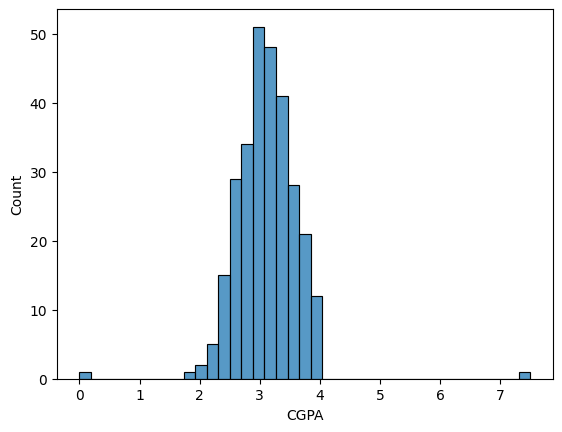

In [ ]:
sns.histplot(df['CGPA'])
plt.show()

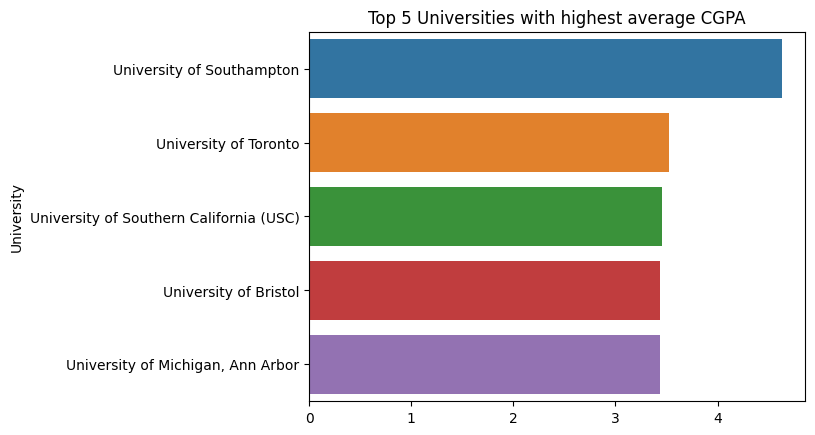

In [ ]:
#Task-1
avg_cgpa = df.groupby('University')['CGPA'].mean()
avg_cgpa = avg_cgpa.sort_values(ascending=False)
avg_cgpa = avg_cgpa.head(5)
sns.barplot(x=avg_cgpa.values, y=avg_cgpa.index)
plt.title("Top 5 Universities with highest average CGPA")
plt.show()


In [ ]:
#Task-2
temp = pd.DataFrame()
temp['Length'] = [len(i) for i in df['Student']]
correlation = df['CGPA'].corr(temp['Length'])
print("Correlation between the CGPA and the length of the student's name:", correlation)

Correlation between the CGPA and the length of the student's name: 0.08740717498168384


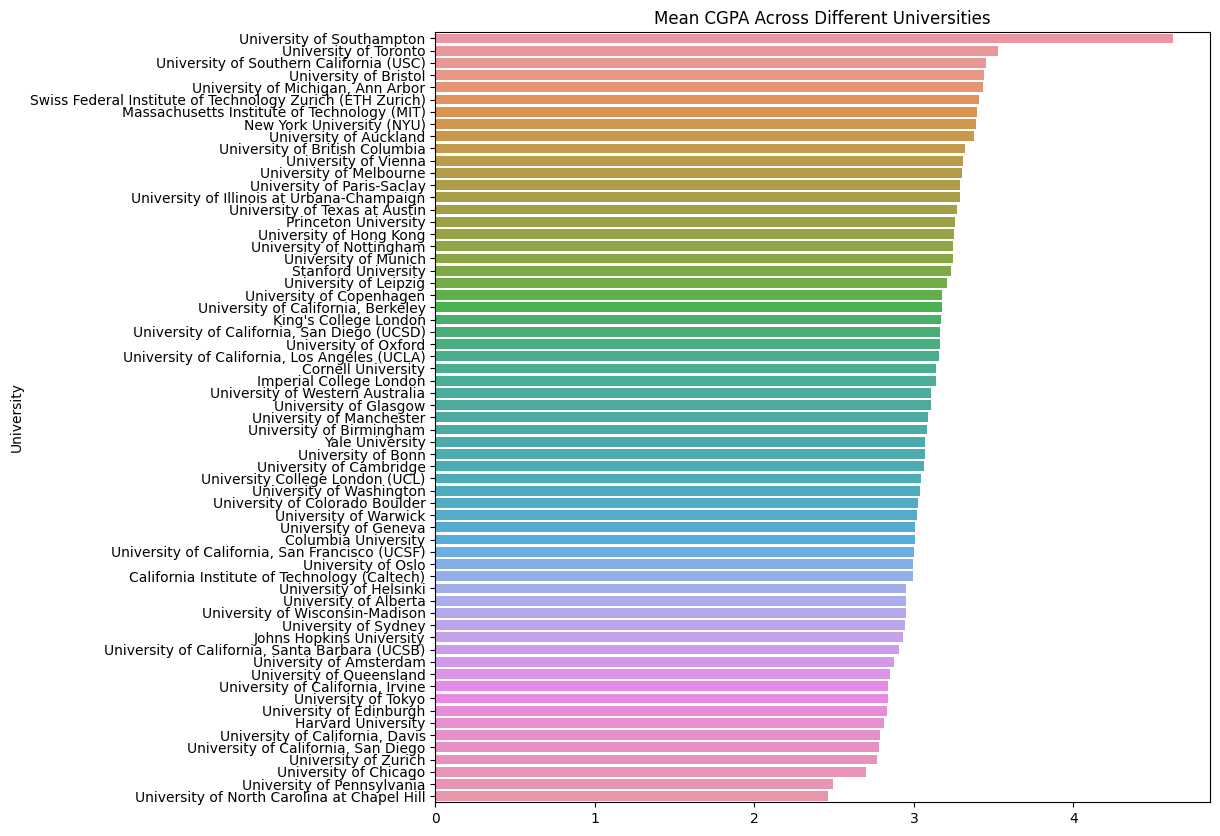

In [ ]:
#Task-3
avg_cgpa = df.groupby('University')['CGPA'].mean()
avg_cgpa = avg_cgpa.sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=avg_cgpa.values, y=avg_cgpa.index)
plt.title("Mean CGPA Across Different Universities")
plt.show()

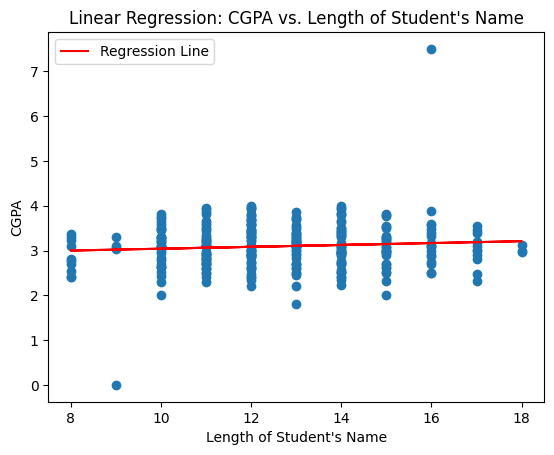

R-squared: 0.007382907528639682
MSE: 0.2773748287946961


In [ ]:
#Task-4
model = LinearRegression()
X=np.array(temp['Length']).reshape(-1, 1)
Y = np.array(df['CGPA']).reshape(-1, 1)
mean_cgpa = np.nanmean(Y)  # Calculate the mean of non-missing CGPA values
Y = np.where(np.isnan(Y), mean_cgpa, Y)
model.fit(X,Y)

plt.scatter(X, Y)
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Length of Student's Name")
plt.ylabel("CGPA")
plt.title("Linear Regression: CGPA vs. Length of Student's Name")
plt.legend()
plt.show()

print("R-squared:", metrics.r2_score(Y,model.predict(X)))
print("MSE:", metrics.mean_squared_error(Y,model.predict(X)))
#We cannot calculate CGPA by student name length because r2_score is very low

In [ ]:
#Task-5
filtered_df = df[df['CGPA'] >= 3.3]
no_students = filtered_df.groupby('University')['CGPA'].count()
ans = no_students.sort_values(ascending=False).head(1).index.str.strip().tolist()[0]
print(f'The University which has the highest number of students \nwith a CGPA above 3.3: \033[1m{ans}\033[0m')

The University which has the highest number of students 
with a CGPA above 3.3: Princeton University


In [ ]:
#Task-6
def identify_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

# Create a dictionary to store outliers for each university
grouped_data = df.groupby('University')['CGPA']
outliers_by_university = {name: identify_outliers(group) for name, group in grouped_data}

In [ ]:
# Print the outliers for each university
for university, outliers in outliers_by_university.items():
    if not outliers.empty:
        print(f"Outliers for {university}:")
        print(outliers)

Outliers for King's College London:
298    2.5
Name: CGPA, dtype: float64
Outliers for Princeton University:
6    2.5
Name: CGPA, dtype: float64
Outliers for University of Alberta:
64    2.2
Name: CGPA, dtype: float64
Outliers for University of California, Berkeley:
78     2.60
178    3.85
Name: CGPA, dtype: float64
Outliers for University of California, Irvine:
234    3.48
Name: CGPA, dtype: float64
Outliers for University of California, Los Angeles (UCLA):
16     2.76
181    3.70
Name: CGPA, dtype: float64
Outliers for University of California, San Francisco (UCSF):
292    3.81
Name: CGPA, dtype: float64
Outliers for University of California, Santa Barbara (UCSB):
197    3.7
Name: CGPA, dtype: float64
Outliers for University of Manchester:
155    3.93
Name: CGPA, dtype: float64
Outliers for University of Pennsylvania:
12    0.0
Name: CGPA, dtype: float64
Outliers for University of Washington:
79     3.58
279    2.50
Name: CGPA, dtype: float64


In [ ]:
#Task-7
X = np.array(df['CGPA']).reshape(-1,1)
mean_cgpa = np.nanmean(X)  # Calculate the mean of non-missing CGPA values
X = np.where(np.isnan(X), mean_cgpa, X)
inertias = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(X)
  inertias.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

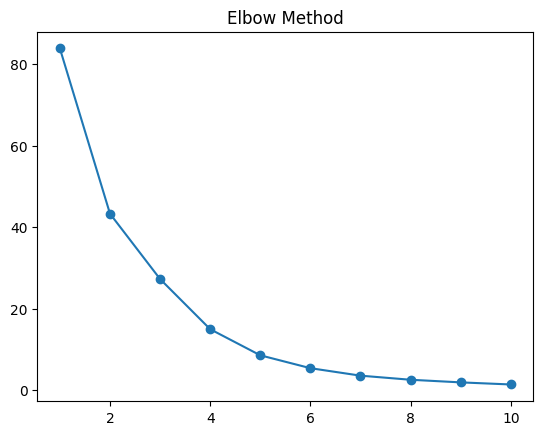

In [ ]:
plt.plot(range(1,11) , inertias , marker = 'o')
plt.title("Elbow Method")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


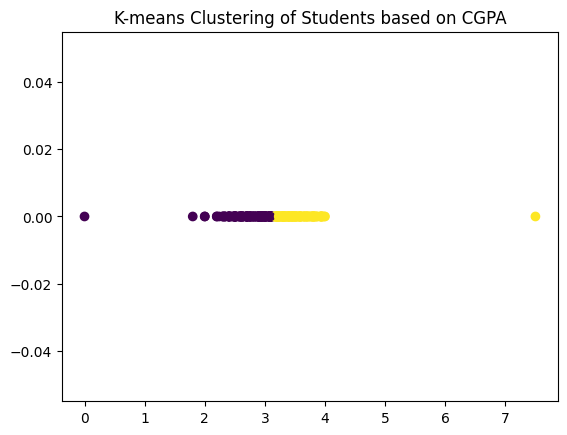

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(df['CGPA'],np.zeros(len(df)),c=kmeans.labels_)
plt.title('K-means Clustering of Students based on CGPA')
plt.show()

In [ ]:
#Task-8
df['Cluster'] = kmeans.labels_
filter_data = df.groupby('Cluster')['CGPA'].mean()

In [ ]:
print("Average CGPA of clusters:\n",filter_data)

Average CGPA of clusters:
 Cluster
0    2.753270
1    3.517362
Name: CGPA, dtype: float64


In [ ]:
#Task-9
X = df[['CGPA']]
y = df['University']
mean_cgpa = np.nanmean(X)  # Calculate the mean of non-missing CGPA values
X = np.where(np.isnan(X), mean_cgpa, X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the universities for the test data
y_pred = clf.predict(X_test)
#Task-10
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy:" , round(accuracy*100,2),"%")

Accuracy: 2.67 %


In [ ]:
#Task-11
print("Average CGPA across all universities:",round(df['CGPA'].mean(),3))

Average CGPA across all universities: 3.097


In [ ]:
#Task-12
X = df[['University']]
y = df['CGPA']
mean_cgpa = np.nanmean(y)  # Calculate the mean of non-missing CGPA values
y = np.where(np.isnan(y), mean_cgpa, y)
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
#Task-13
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.35


In [ ]:
#Task-14
print("Number of Missing values in CGPA:",df['CGPA'].isna().sum())
print("Number of CGPAs greater than 4:",df['CGPA'][df['CGPA']>4].count())
df['CGPA'] = df['CGPA'][df['CGPA'] <= 4]

Number of Missing values in CGPA: 11
Number of CGPAs greater than 4: 1


<ipython-input-398-effbd0e08153>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CGPA'] = df['CGPA'][df['CGPA'] <= 4]


In [ ]:
df['CGPA']=df['CGPA'].fillna(df['CGPA'].mean())


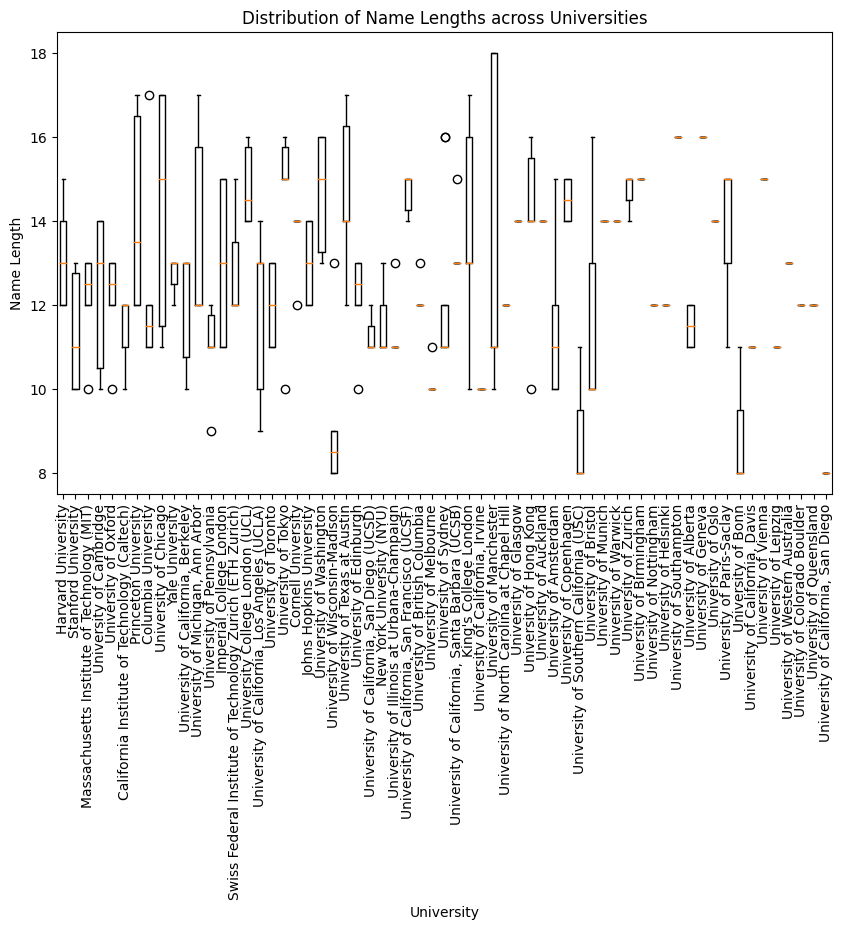

In [ ]:
#Task-15
temp = pd.DataFrame()
temp['University'] = df['University']
temp['Length'] = [len(i) for i in df['Student']]
plt.figure(figsize=(10, 6))
plt.boxplot([temp[temp['University'] == uni]['Length'] for uni in df['University'].unique()],
            labels=df['University'].unique())
plt.xlabel('University')
plt.ylabel('Name Length')
plt.title("Distribution of Name Lengths across Universities")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Task-16
data_max = df.groupby('University')['CGPA'].max()
data_max

University
California Institute of Technology (Caltech)    3.43
Columbia University                             3.59
Cornell University                              3.66
Harvard University                              3.50
Imperial College London                         3.79
                                                ... 
University of Washington                        3.58
University of Western Australia                 3.37
University of Wisconsin-Madison                 3.40
University of Zurich                            3.01
Yale University                                 3.24
Name: CGPA, Length: 63, dtype: float64

In [ ]:
data_min = df.groupby('University')['CGPA'].min()
data_min

University
California Institute of Technology (Caltech)    2.61
Columbia University                             2.70
Cornell University                              2.24
Harvard University                              2.00
Imperial College London                         2.70
                                                ... 
University of Washington                        2.50
University of Western Australia                 2.70
University of Wisconsin-Madison                 2.40
University of Zurich                            2.60
Yale University                                 2.90
Name: CGPA, Length: 63, dtype: float64

In [ ]:
ans = data_max-data_min
ans

University
California Institute of Technology (Caltech)    0.82
Columbia University                             0.89
Cornell University                              1.42
Harvard University                              1.50
Imperial College London                         1.09
                                                ... 
University of Washington                        1.08
University of Western Australia                 0.67
University of Wisconsin-Madison                 1.00
University of Zurich                            0.41
Yale University                                 0.34
Name: CGPA, Length: 63, dtype: float64

In [ ]:
#Task-17
X1 = df[['University']]
X2 = df[['CGPA']]
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = ct.fit_transform(X1)
ag = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X2,X_encoded)

In [ ]:
#Task-18
name_lengths = [len(i) for i in df['Student']]
cgpa = df[['CGPA']].values
X = np.column_stack((cgpa, name_lengths))
y = df['University']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the universities for the test data
y_pred = clf.predict(X_test)
#Task-19
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy:" , round(accuracy*100,2),"%")

Accuracy: 5.33 %


In [ ]:
#Task-18
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#Task-19
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy:" , round(accuracy*100,2),"%")

Accuracy: 2.67 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Task-18
cr = RidgeClassifier()
cr.fit(X_train, y_train)
y_pred = cr.predict(X_test)
#Task-19
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy:" , round(accuracy*100,2),"%")

Accuracy: 1.33 %


In [ ]:
#Task-20
df['Name_Length'] = df['Student'].apply(len)
correlations_by_university = df.groupby('University')['Name_Length', 'CGPA'].corr().iloc[0::2, -1]

# Print the correlations for each university
print("Correlation between Name Length and CGPA within each university:")
print(correlations_by_university)

<ipython-input-442-4b0e4b3417bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name_Length'] = df['Student'].apply(len)
<ipython-input-442-4b0e4b3417bd>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlations_by_university = df.groupby('University')['Name_Length', 'CGPA'].corr().iloc[0::2, -1]


Correlation between Name Length and CGPA within each university:
University                                               
California Institute of Technology (Caltech)  Name_Length    0.098097
Columbia University                           Name_Length   -0.199380
Cornell University                            Name_Length   -0.203747
Harvard University                            Name_Length   -0.219273
Imperial College London                       Name_Length    0.684085
                                                               ...   
University of Washington                      Name_Length   -0.163357
University of Western Australia               Name_Length         NaN
University of Wisconsin-Madison               Name_Length    0.742487
University of Zurich                          Name_Length   -0.977951
Yale University                               Name_Length    0.866025
Name: CGPA, Length: 63, dtype: float64
